# Siska Kumala
### Assignment 3

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
pd.set_option('display.max.columns',None)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Load Data Set
df = pd.read_csv('./Dataset/bank-additional/bank-additional.csv',sep=";")
print ('Data read into a pandas dataframe!')
df

Data read into a pandas dataframe!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
#lihat top data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#lihat data paling bawah
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [5]:
df.shape
#mengetahui jumlah row dan columns data

(4119, 21)

In [6]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
listfeatures = ['age','job','marital','education','default','housing','loan','contact','duration']
df[listfeatures].describe()

,age,duration
count,4119.000000,4119.000000
mean,40.113620,256.788055
std,10.313362,254.703736
min,18.000000,0.000000
25%,32.000000,103.000000
50%,38.000000,181.000000
75%,47.000000,317.000000
max,88.000000,3643.000000


In [8]:
for i in listfeatures:
    print(df[i].value_counts(),'\n')

32    216
31    191
30    177
34    174
35    172
     ... 
69      2
72      2
19      1
88      1
85      1
Name: age, Length: 67, dtype: int64 

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64 

married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64 

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64 

no         3315
unknown     803
yes           1
Name: default, dtype: int64 

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64 

no         3349
yes         665
unknown     105
Name

In [9]:
print('total data after delete unused rows: ', len(df[(df['education']!='illiterate')& (df['marital']!='unknown') & (df['default']!='yes')][listfeatures]))

total data after delete unused rows:  4106


In [10]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))


Empty DataFrame
Columns: []
Index: [percent missing, how many missing]


In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [12]:
#konversi data menjadi numeric 0 dan 1
from sklearn.preprocessing import LabelEncoder
y = df['y'].values
print('data y sebelum konversi: ',y)
label_y_encoder = LabelEncoder().fit(y)
y_konversi = label_y_encoder.transform(y)
print('data y setelah konversi: ',y_konversi)
print('class before transform: ',label_y_encoder.classes_)

data y sebelum konversi:  ['no' 'no' 'no' ... 'no' 'no' 'no']
data y setelah konversi:  [0 0 0 ... 0 0 0]
class before transform:  ['no' 'yes']


In [13]:
data_job = df['job'].values
print('data job 1 sebelum konversi: ',data_job)
label_datajob_encoder = LabelEncoder().fit(data_job)
data_job_konversi = label_datajob_encoder.transform(data_job)
print('data feature job setelah konversi: ',data_job_konversi)
print('class before transform: ',label_datajob_encoder.classes_)

data_marital = df['marital'].values
print('data marital 1 sebelum konversi: ',data_marital)
label_datamarital_encoder = LabelEncoder().fit(data_marital)
data_marital_konversi = label_datamarital_encoder.transform(data_marital)
print('data feature marital setelah konversi: ',data_marital_konversi)
print('class before transform: ',label_datamarital_encoder.classes_)


data_education = df['education'].values
print('data education 1 sebelum konversi: ',data_education)
label_dataeducation_encoder = LabelEncoder().fit(data_education)
data_education_konversi = label_dataeducation_encoder.transform(data_education)
print('data feature education setelah konversi: ',data_education_konversi)
print('class before transform: ',label_dataeducation_encoder.classes_)


data_default = df['default'].values
print('data default 1 sebelum konversi: ',data_default)
label_datadefault_encoder = LabelEncoder().fit(data_default)
data_default_konversi = label_datadefault_encoder.transform(data_default)
print('data feature default setelah konversi: ',data_default_konversi)
print('class before transform: ',label_datadefault_encoder.classes_)


data_housing = df['housing'].values
print('data housing 1 sebelum konversi: ',data_housing)
label_datahousing_encoder = LabelEncoder().fit(data_housing)
data_housing_konversi = label_datahousing_encoder.transform(data_housing)
print('data feature housing setelah konversi: ',data_housing_konversi)
print('class before transform: ',label_datahousing_encoder.classes_)


data_loan = df['loan'].values
print('data loan 1 sebelum konversi: ',data_loan)
label_dataloan_encoder = LabelEncoder().fit(data_loan)
data_loan_konversi = label_dataloan_encoder.transform(data_loan)
print('data feature loan setelah konversi: ',data_loan_konversi)
print('class before transform: ',label_dataloan_encoder.classes_)

data_contact = df['contact'].values
print('data contact 1 sebelum konversi: ',data_contact)
label_datacontact_encoder = LabelEncoder().fit(data_contact)
data_contact_konversi = label_datacontact_encoder.transform(data_contact)
print('data feature contact setelah konversi: ',data_contact_konversi)
print('class before transform: ',label_datacontact_encoder.classes_)

data job 1 sebelum konversi:  ['blue-collar' 'services' 'services' ... 'student' 'admin.' 'management']
data feature job setelah konversi:  [1 7 7 ... 8 0 4]
class before transform:  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
data marital 1 sebelum konversi:  ['married' 'single' 'married' ... 'single' 'married' 'single']
data feature marital setelah konversi:  [1 2 1 ... 2 1 2]
class before transform:  ['divorced' 'married' 'single' 'unknown']
data education 1 sebelum konversi:  ['basic.9y' 'high.school' 'high.school' ... 'high.school' 'high.school'
 'high.school']
data feature education setelah konversi:  [2 3 3 ... 3 3 3]
class before transform:  ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
data default 1 sebelum konversi:  ['no' 'no' 'no' ... 'no' 'no' 'no']
data feature default setelah konversi:  [0 0 0 ... 0

In [14]:
df['y_konversi'] = y_konversi
df['data_job_konversi'] = data_job_konversi
df['data_marital_konversi'] = data_marital_konversi
df['data_education_konversi'] = data_education_konversi
df['data_default_konversi'] = data_default_konversi
df['data_housing_konversi'] = data_housing_konversi
df['data_loan_konversi'] = data_loan_konversi
df['data_contact_konversi'] = data_contact_konversi
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_konversi,data_job_konversi,data_marital_konversi,data_education_konversi,data_default_konversi,data_housing_konversi,data_loan_konversi,data_contact_konversi
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,1,2,0,2,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,7,2,3,0,0,0,1
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,7,1,3,0,2,0,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,7,1,2,0,1,1,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,1,6,0,2,0,0


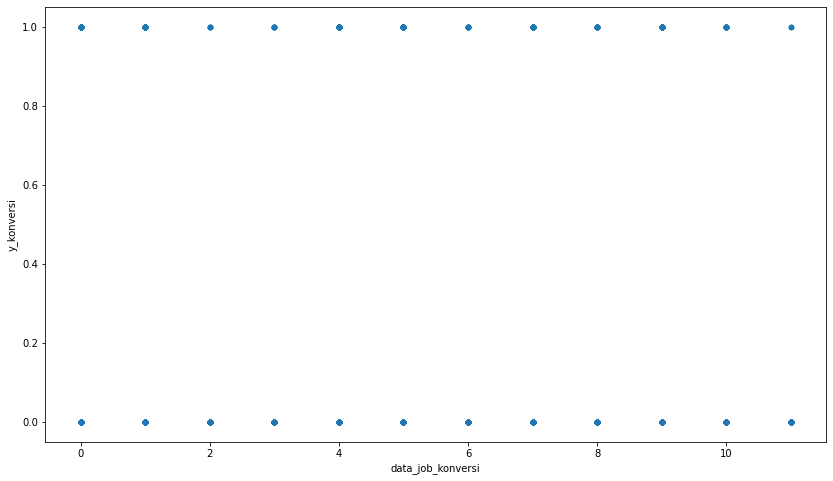

In [15]:
df_job_target = df[['y_konversi','data_job_konversi']]
df_job_target.plot(kind='scatter', x='data_job_konversi', y='y_konversi', figsize=(14,8))
plt.show()

In [16]:
df.groupby(by=['y_konversi'])['data_job_konversi'].count()

y_konversi
0    3668
1     451
Name: data_job_konversi, dtype: int64

In [17]:
df.groupby(by=['y_konversi','data_job_konversi'])['data_job_konversi'].count()

y_konversi  data_job_konversi
0           0                    879
            1                    823
            2                    140
            3                     99
            4                    294
            5                    128
            6                    146
            7                    358
            8                     63
            9                    611
            10                    92
            11                    35
1           0                    133
            1                     61
            2                      8
            3                     11
            4                     30
            5                     38
            6                     13
            7                     35
            8                     19
            9                     80
            10                    19
            11                     4
Name: data_job_konversi, dtype: int64

In [18]:
job_konv_group = df.groupby(by=['job','y'])['job'].count()
job_konv_group

job            y  
admin.         no     879
               yes    133
blue-collar    no     823
               yes     61
entrepreneur   no     140
               yes      8
housemaid      no      99
               yes     11
management     no     294
               yes     30
retired        no     128
               yes     38
self-employed  no     146
               yes     13
services       no     358
               yes     35
student        no      63
               yes     19
technician     no     611
               yes     80
unemployed     no      92
               yes     19
unknown        no      35
               yes      4
Name: job, dtype: int64

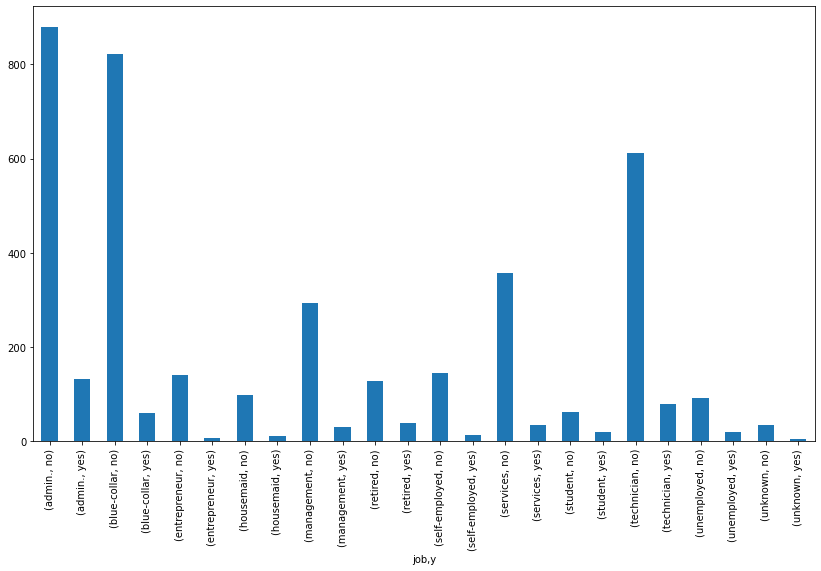

In [19]:
job_konv_group.plot(kind='bar',figsize=(14,8))
plt.show()

In [20]:
data_feature= df[['age','data_job_konversi']].values
print('data feature:',data_feature )
print('shape data feature:',data_feature.shape )

target_y_konversi = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data feature: [[30  1]
 [39  7]
 [25  7]
 ...
 [27  8]
 [58  0]
 [34  4]]
shape data feature: (4119, 2)
data y: [0 0 0 ... 0 0 0]
shape data y: (4119,)


In [21]:
data_5feature = df[['age','data_job_konversi', 'data_loan_konversi', 'data_default_konversi', 'duration']].values
print('data 5feature:',data_5feature )
print('shape data 5feature:',data_5feature.shape )

target_y_konversi_5f = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 5feature: [[ 30   1   0   0 487]
 [ 39   7   0   0 346]
 [ 25   7   0   0 227]
 ...
 [ 27   8   0   0  64]
 [ 58   0   0   0 528]
 [ 34   4   0   0 175]]
shape data 5feature: (4119, 5)
data y: [0 0 0 ... 0 0 0]
shape data y: (4119,)


In [22]:
data_9feature = df[['age','data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi','data_contact_konversi', 'duration']].values
print('data 9 feature:',data_9feature )
print('shape data 9 feature:',data_9feature.shape )

target_y_konversi_9f = df[['y_konversi']].values.reshape(len(y_konversi))
print('data y:',target_y_konversi )
print('shape data y:',target_y_konversi.shape )

data 9 feature: [[ 30   1   1 ...   0   0 487]
 [ 39   7   2 ...   0   1 346]
 [ 25   7   1 ...   0   1 227]
 ...
 [ 27   8   2 ...   0   0  64]
 [ 58   0   1 ...   0   0 528]
 [ 34   4   2 ...   0   0 175]]
shape data 9 feature: (4119, 9)
data y: [0 0 0 ... 0 0 0]
shape data y: (4119,)


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model_ykonv_5f = KNeighborsClassifier(n_neighbors=5).fit(data_5feature,target_y_konversi_5f)

model_ykonv_9f = KNeighborsClassifier(n_neighbors=5).fit(data_9feature,target_y_konversi_9f)

In [24]:
prediksi_ykonv_5f = model_ykonv_5f.predict(data_5feature)
print(prediksi_ykonv_5f)


prediksi_ykonv_9f = model_ykonv_9f.predict(data_9feature)
print(prediksi_ykonv_9f)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Performance

In [25]:
performance_model_5f = model_ykonv_5f.score(data_5feature,target_y_konversi_5f)
print('performance model 5 features : ',performance_model_5f)

performance_model_9f = model_ykonv_9f.score(data_9feature,target_y_konversi_9f)
print('performance model 9 features : ',performance_model_9f)

performance model 5 features :  0.9079873755765963
performance model 9 features :  0.9072590434571498


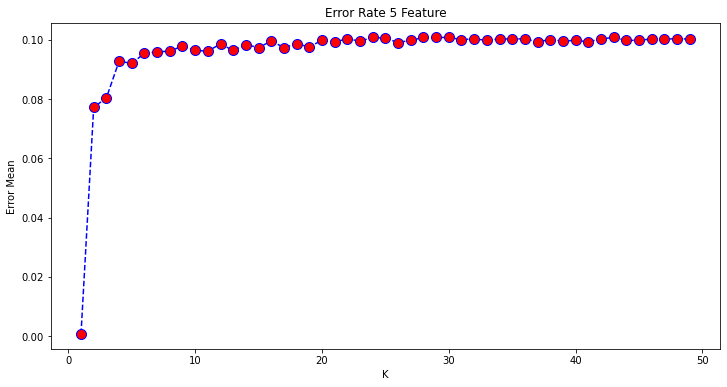

In [26]:
error_5f = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_5f_loop = KNeighborsClassifier(n_neighbors=x).fit(data_5feature,target_y_konversi_5f)
    prediksi_ykonv_5f_loop = model_ykonv_5f_loop.predict(data_5feature)
    error_5f.append(np.mean(prediksi_ykonv_5f_loop!=target_y_konversi_5f))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error_5f, color = 'blue', linestyle = 'dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate 5 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

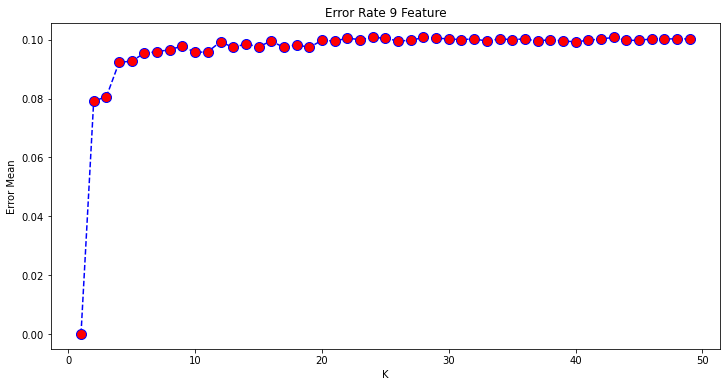

In [27]:
error_9f = []
neighbors_loop = range(1,50)
for x in neighbors_loop:
    model_ykonv_loop_9f = KNeighborsClassifier(n_neighbors=x).fit(data_9feature,target_y_konversi_9f)
    prediksi_ykonv_loop_9f = model_ykonv_loop_9f.predict(data_9feature)
    error_9f.append(np.mean(prediksi_ykonv_loop_9f!=target_y_konversi_9f))
plt.figure(figsize=(12,6))
plt.plot(neighbors_loop,error_9f, color = 'blue', linestyle = 'dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate 9 Feature')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
features_data = df[['age','data_job_konversi', 'data_loan_konversi', 'data_default_konversi', 'duration']].values
target_data = df[['y_konversi']].values.reshape(-1,1)

x_5f_train,x_5f_test,y_5f_train,y_5f_test = train_test_split(features_data,target_data,test_size=0.25)
y_5f_test = y_5f_test.reshape(len(y_5f_test))
y_5f_train = y_5f_train.reshape(len(y_5f_train))
print('shape feature total: ', features_data.shape)
print('shape feature train: ', x_5f_train.shape)
print('shape feature test: ', x_5f_test.shape)
print('shape target test: ', y_5f_test.shape)

shape feature total:  (4119, 5)
shape feature train:  (3089, 5)
shape feature test:  (1030, 5)
shape target test:  (1030,)


In [29]:
features_9f_data = df[['age','data_job_konversi','data_marital_konversi','data_education_konversi','data_default_konversi','data_housing_konversi','data_loan_konversi','data_contact_konversi', 'duration']].values
target_9f_data = df[['y_konversi']].values.reshape(-1,1)

x_9f_train,x_9f_test,y_9f_train,y_9f_test = train_test_split(features_9f_data,target_9f_data,test_size=0.25)
y_9f_test = y_9f_test.reshape(len(y_9f_test))
y_9f_train = y_9f_train.reshape(len(y_9f_train))
print('shape feature total: ', features_9f_data.shape)
print('shape feature train: ', x_9f_train.shape)
print('shape feature test: ', x_9f_test.shape)
print('shape target test: ', y_9f_test.shape)

shape feature total:  (4119, 9)
shape feature train:  (3089, 9)
shape feature test:  (1030, 9)
shape target test:  (1030,)


# Metode lain Gaussian Naive Bayes(GNB), Random Forest, dan Decision Tree

# Gaussian Naive Bayes(GNB)

In [30]:
from sklearn.naive_bayes import GaussianNB
model_5f_GNB = GaussianNB().fit(x_5f_train,y_5f_train)
model_9f_GNB = GaussianNB().fit(x_9f_train,y_9f_train)

In [31]:
y_5f_train_prediksi_GNB = model_5f_GNB.predict(x_5f_train)
print(y_5f_train_prediksi_GNB)


y_9f_train_prediksi_GNB = model_9f_GNB.predict(x_9f_train)
print(y_9f_train_prediksi_GNB)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [32]:
perf_model_5f_GNB = model_5f_GNB.score(x_5f_train,y_5f_train)
print('performance model 5 features GNB : ',perf_model_5f_GNB)


perf_model_9f_GNB = model_9f_GNB.score(x_9f_train,y_9f_train)
print('performance model 9 features GNB : ',perf_model_9f_GNB)

performance model 5 features GNB :  0.8970540628034963
performance model 9 features GNB :  0.89640660407899


In [33]:
conf_matrix_5f_GNB = confusion_matrix(y_5f_train,y_5f_train_prediksi_GNB)
print(conf_matrix_5f_GNB)

conf_matrix_9f_GNB = confusion_matrix(y_9f_train,y_9f_train_prediksi_GNB)
print(conf_matrix_9f_GNB)

[[2663   84]
 [ 234  108]]
[[2657   89]
 [ 231  112]]


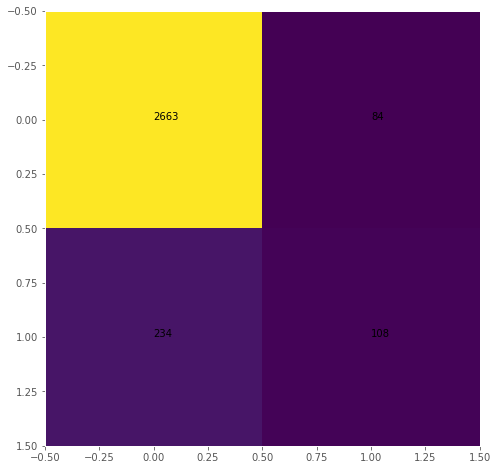

In [34]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_5f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_5f_GNB[0])):
    for j in range (len(conf_matrix_5f_GNB[0])):
        ax.text(j,i,conf_matrix_5f_GNB[i,j])
plt.show()

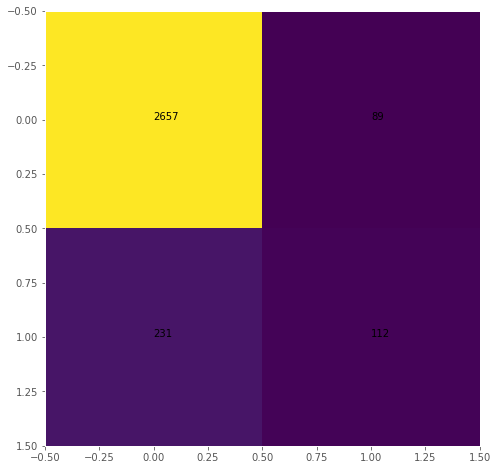

In [35]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_9f_GNB)
ax.grid(False)
for i in range (len(conf_matrix_9f_GNB[0])):
    for j in range (len(conf_matrix_9f_GNB[0])):
        ax.text(j,i,conf_matrix_9f_GNB[i,j])
plt.show()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_5f_RF = RandomForestClassifier().fit(x_5f_train,y_5f_train)


model_9f_RF = RandomForestClassifier().fit(x_9f_train,y_9f_train)

In [37]:
y_train_prediksi_5f_RF = model_5f_RF.predict(x_5f_train)
print(y_train_prediksi_5f_RF)


y_train_prediksi_9f_RF = model_9f_RF.predict(x_9f_train)
print(y_train_prediksi_9f_RF)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]


In [38]:
perf_model_5f_RF = model_5f_RF.score(x_5f_train,y_5f_train)
print('performance model RF 5 features : ',perf_model_5f_RF)


perf_model_9f_RF = model_9f_RF.score(x_9f_train,y_9f_train)
print('performance model RF 9 features : ',perf_model_9f_RF)


performance model RF 5 features :  0.9990288119132406
performance model RF 9 features :  1.0


In [39]:
conf_matrix_5f_RF = confusion_matrix(y_5f_train,y_train_prediksi_5f_RF)
print(conf_matrix_5f_RF)
conf_matrix_9f_RF = confusion_matrix(y_9f_train,y_train_prediksi_9f_RF)
print(conf_matrix_9f_RF)

[[2747    0]
 [   3  339]]
[[2746    0]
 [   0  343]]


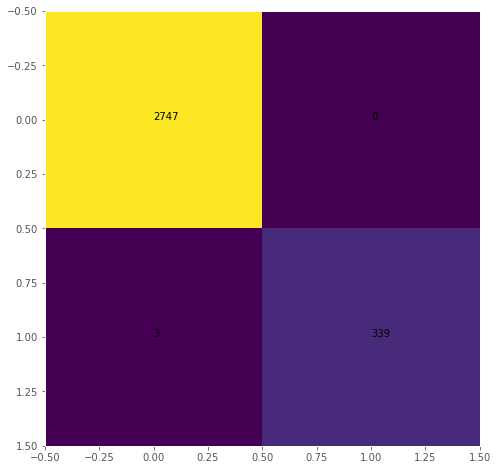

In [40]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_5f_RF)
ax.grid(False)
for i in range (len(conf_matrix_5f_RF[0])):
    for j in range (len(conf_matrix_5f_RF[0])):
        ax.text(j,i,conf_matrix_5f_RF[i,j])
plt.show()

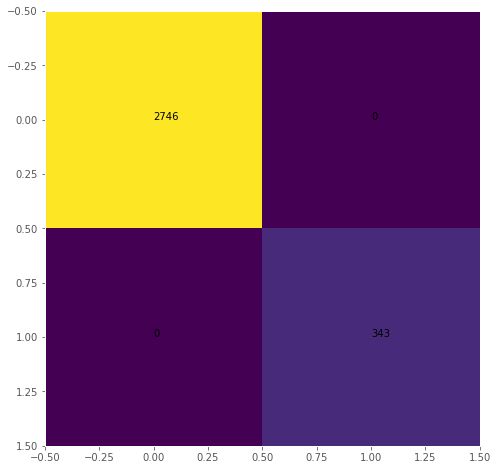

In [41]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_9f_RF)
ax.grid(False)
for i in range (len(conf_matrix_9f_RF[0])):
    for j in range (len(conf_matrix_9f_RF[0])):
        ax.text(j,i,conf_matrix_9f_RF[i,j])
plt.show()

# Desician Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_5f_DT = DecisionTreeClassifier().fit(x_5f_train,y_5f_train)


model_9f_DT = DecisionTreeClassifier().fit(x_9f_train,y_9f_train)


In [43]:
y_train_prediksi_5f_DT = model_5f_DT.predict(x_5f_train)
print(y_train_prediksi_5f_DT)
y_train_prediksi_9f_DT = model_9f_DT.predict(x_9f_train)
print(y_train_prediksi_9f_DT)

[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 0]


In [44]:
perf_model_5f_DT = model_5f_DT.score(x_5f_train,y_5f_train)
print('performance model DT 5 features: ',perf_model_5f_DT)
perf_model_9f_DT = model_9f_DT.score(x_9f_train,y_9f_train)
print('performance model DT 9 features: ',perf_model_9f_DT)

performance model DT 5 features:  0.9993525412754937
performance model DT 9 features:  1.0


In [45]:
conf_matrix_5f_DT = confusion_matrix(y_5f_train,y_train_prediksi_5f_DT)
print(conf_matrix_5f_DT)
conf_matrix_9f_DT = confusion_matrix(y_9f_train,y_train_prediksi_9f_DT)
print(conf_matrix_9f_DT)

[[2747    0]
 [   2  340]]
[[2746    0]
 [   0  343]]


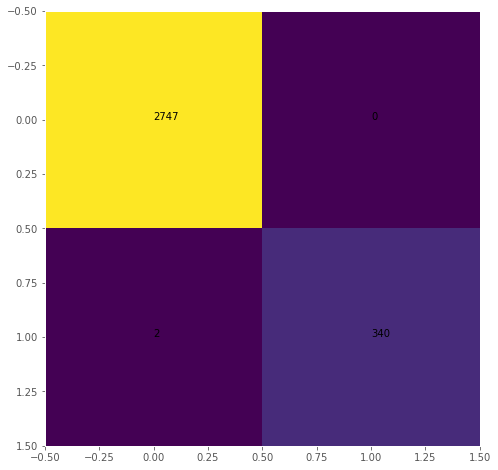

In [46]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_5f_DT)
ax.grid(False)
for i in range (len(conf_matrix_5f_DT[0])):
    for j in range (len(conf_matrix_5f_DT[0])):
        ax.text(j,i,conf_matrix_5f_DT[i,j])
plt.show()

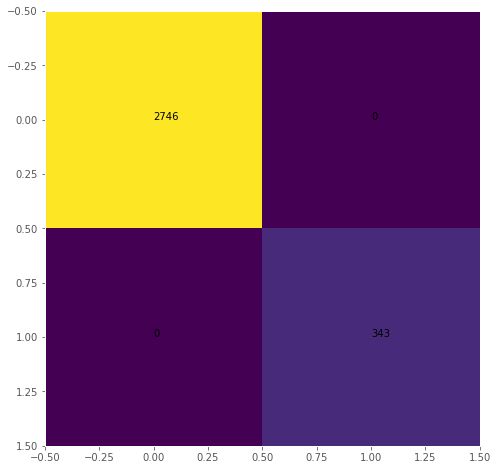

In [47]:
mpl.style.use(['ggplot'])
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow (conf_matrix_9f_DT)
ax.grid(False)
for i in range (len(conf_matrix_9f_DT[0])):
    for j in range (len(conf_matrix_9f_DT[0])):
        ax.text(j,i,conf_matrix_9f_DT[i,j])
plt.show()

# Kesimpulan

In [48]:
rekap_score_5f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_5f, perf_model_5f_GNB, perf_model_5f_RF, perf_model_5f_DT]} 
output_rekap_score_5f = pd.DataFrame(rekap_score_5f)
output_rekap_score_5f

,Model,Score
0,k-NN,0.907987
1,Gaussian Naive Bayes,0.897054
2,Random Forest,0.999029
3,Decision Tree,0.999353


In [49]:
rekap_score_9f = {'Model':['k-NN', 'Gaussian Naive Bayes', 'Random Forest', 'Decision Tree'], 
        'Score':[performance_model_9f, perf_model_9f_GNB, perf_model_9f_RF, perf_model_9f_DT]} 
output_rekap_score_9f = pd.DataFrame(rekap_score_9f)
output_rekap_score_9f

,Model,Score
0,k-NN,0.907259
1,Gaussian Naive Bayes,0.896407
2,Random Forest,1.000000
3,Decision Tree,1.000000
